In [18]:
#Basics
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Preprocessing
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.decomposition import PCA

#Regression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn import svm
#import xgboost as xgb

#Report
from sklearn.metrics import classification_report

#Validation
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

#Metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [2]:
df24 = pd.read_csv("C:/Users/Daniel/Documents/GitHub/SuperProyecto/Notebooks PROYECTO/csv definitivos/Q1Q3_tweets_24_tendencias_variables.csv", sep = ";")
df24n = pd.read_csv("C:/Users/Daniel/Documents/GitHub/SuperProyecto/Notebooks PROYECTO/csv definitivos/Q3_tweets_24_notendencias_variables.csv", sep = ";")

In [3]:
df25 = pd.read_csv("C:/Users/Daniel/Documents/GitHub/SuperProyecto/Notebooks PROYECTO/csv definitivos/Q1Q3_tweets_25_tendencias_variables.csv", sep = ";")
df25n = pd.read_csv("C:/Users/Daniel/Documents/GitHub/SuperProyecto/Notebooks PROYECTO/csv definitivos/Q3_tweets_25_notendencias_variables.csv", sep = ";")

In [4]:
del(df24n["Unnamed: 0"])
del(df24["Unnamed: 0"])
del(df25n["Unnamed: 0"])
del(df25["Unnamed: 0"])

In [5]:
df24["target"]=1
df24n["target"]=0
df25["target"]=1
df25n["target"]=0

In [6]:
df_train = pd.concat([df24, df24n])

In [7]:
del(df_train["start_lifetime"])

In [8]:
df_train.shape

(1046, 41)

In [9]:
X = df_train.iloc[:, 2:-1].values
y = df_train.iloc[:, -1].values

In [10]:
df_test = pd.concat([df25, df25n])

In [11]:
del(df_test["start_lifetime"])

In [12]:
df_test

,trend,hour,total_tweets,total_hashtags,total_mentions,total_reply_to,total_url,total_photo,total_retweets,total_likes,...,tweet_acc_56,tweet_acc_67,user_count_01,user_count_12,user_count_23,user_count_34,user_count_45,user_count_56,user_count_67,target
0,#AndaSeatEnFnac,8.0,247,1151,279,309,63,140,1050.0,3877.0,...,62,52,13,20,36,44,25,44,122,1
1,#Askelarre,8.0,239,249,270,363,18,22,273.0,1026.0,...,-25,-9,0,48,72,59,64,51,49,1
2,#BTSonFallon,6.0,145,162,150,156,8,20,260.0,2668.0,...,-109,45,0,0,4,80,113,47,18,1
3,#BTSonFallon,9.0,1588,1682,1687,2918,76,124,2152.0,8423.0,...,-153,24,1,324,572,522,510,385,247,1
4,#BTSonFallon,12.0,330,378,351,505,79,41,476.0,2574.0,...,-2,-22,1,93,147,102,97,91,69,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
655,#cuidadospaliativos,NaN,1054,1054,1083,1261,45,58,2759.0,26208.0,...,580,-106,0,0,0,0,0,537,981,0
656,#esadnorte,NaN,1643,1643,1662,1916,24,38,1702.0,18546.0,...,870,-97,0,0,0,0,0,789,1478,0
657,#innerashes,NaN,2366,2366,2429,2969,92,198,2091.0,34923.0,...,12,-46,0,0,415,838,880,905,919,0
658,#iheartawards,NaN,2694,2694,2925,4139,541,530,12605.0,35090.0,...,-19,-41,377,781,732,661,678,699,687,0


In [13]:
X_test = df_test.iloc[:, 2:-1].values
y_test = df_test.iloc[:, -1].values

# RANDOM FOREST SIN PARÁMETROS

In [14]:
%%time
#RandomForest con ACCURACY,CONFUSION MATRIX y CLASSIFICATION REPORT
clf = RandomForestClassifier()
clf = clf.fit(X, y)
yhat = clf.predict(X_test)
print("Accuracy_score:", accuracy_score(y_test, yhat))
print('------------------------------------')
print("Confusion Matrix:\n", confusion_matrix(y_test, yhat))
print('------------------------------------------------------')
print(classification_report(y_test, yhat))

Accuracy_score: 0.808206106870229
------------------------------------
Confusion Matrix:
 [[513 147]
 [ 54 334]]
------------------------------------------------------
              precision    recall  f1-score   support

           0       0.90      0.78      0.84       660
           1       0.69      0.86      0.77       388

    accuracy                           0.81      1048
   macro avg       0.80      0.82      0.80      1048
weighted avg       0.83      0.81      0.81      1048

Wall time: 2.24 s


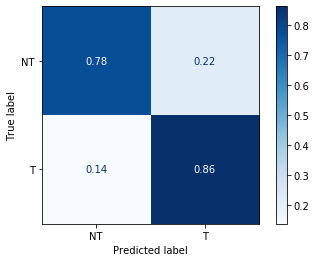

Area bajo la curva:  0.8865862230552952


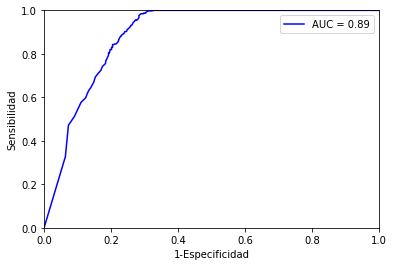

auc: 0.8865862230552952


In [29]:
from sklearn.metrics import plot_confusion_matrix
disp = plot_confusion_matrix(clf, X_test, y_test,
                             display_labels=["NT", "T"],
                             cmap = plt.cm.Blues,
                             normalize = "true")
plt.show()
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
probs = clf.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)
print("Area bajo la curva: ",auc(fpr, tpr))
plt.plot(fpr, tpr, "b", label = "AUC = %0.2f" % roc_auc)
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.legend()
plt.ylabel("Sensibilidad")
plt.xlabel("1-Especificidad")
plt.show()

print("auc:", auc(fpr, tpr))

In [32]:
df_train

,trend,hour,total_tweets,total_hashtags,total_mentions,total_reply_to,total_url,total_photo,total_retweets,total_likes,...,tweet_acc_56,tweet_acc_67,user_count_01,user_count_12,user_count_23,user_count_34,user_count_45,user_count_56,user_count_67,target
0,#conquis6,23.0,881,4484,1115,1011,216,365,3970.0,10555.0,...,-3,45,12,143,250,227,200,175,188,1
1,fabianski,23.0,416,433,418,488,64,27,566.0,1763.0,...,-10,19,0,92,172,152,128,99,92,1
2,Tavares,23.0,679,822,701,883,64,80,595.0,2758.0,...,157,-236,5,5,0,0,145,431,484,1
3,#FirstDates24F,21.0,1140,1434,1159,1286,29,108,2261.0,13837.0,...,75,62,0,738,881,214,91,33,31,1
4,#FirstDates24F,22.0,827,875,858,1473,42,68,2308.0,7412.0,...,-9,26,0,206,313,200,196,183,165,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
529,mismo,NaN,217,217,229,329,34,25,1082.0,2760.0,...,0,217,0,0,0,0,0,0,199,0
530,mismo,NaN,127,127,150,202,21,35,638.0,1648.0,...,0,127,0,0,0,0,0,0,115,0
531,camino,NaN,126,126,132,163,8,14,845.0,3250.0,...,0,126,0,0,0,0,0,0,104,0
532,trabajar,NaN,122,122,140,203,5,12,769.0,4283.0,...,0,122,0,0,0,0,0,0,115,0
